ENG335

Machine Learning

Group-based Assignment

July 2023

T-Group & Team No.	: T01 & Group 3

Date of Submission	: 16/09/2023

Leader: Louis Lim Kiat Yang (PI No. Y2110218)

Members:

*   B Harippriya (PI No. K2170295)
*   Kang Jun Jie, Justin (PI No. B2211041 )
*   Tan Zhen Xuan (PI No. Q2110723)
*   Soon Yong Quan (PI No. H2172212)

# Q2.

##Q2a) Perform EDA Analysis

In [1]:
#Import all of the necessary libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Used to upload local files into Colab
from google.colab import files
uploaded = files.upload()

Saving possum.csv to possum.csv


In [3]:
#After the upload shown in the previous line of code, the possum.csv dataset can be found under files, in the content folder

#Read CSV file into a dataframe
df = pd.read_csv("/content/possum.csv")

#Copy dataframe to a new variable to avoid any accidental changes in the original data
df_new = df.copy()

#Display the dataframe
display(df_new)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


The dataset above shows the information of possums trapped at different sites.

The following are the descriptions of each variable in the dataset above obtained from the kaggle website


*   case = case number
*   site = site number where possum was trapped
*   Pop = Population (Vic-Victoria, Other-New South Wales/Queensland)
*   sex = m(male) / f(female)
*   age = age of possum
*   hdlngth = head length of possum in mm
*   skullw = skull width of possum in mm
*   totlngth = total length of possum in cm
*   taill = tail length of possum in cm
*   footlgth = foot length of possum
*   earconch = ear conch length of possum
*   eye = distance from medial canthus to lateral canthus of right eye of possum
*   chest = chest girth (in cm) of possum
*   belly = belly girth (in cm) of possum


In [4]:
#Print the type of the dataset
type(df_new)

pandas.core.frame.DataFrame

In [5]:
#Display the number of rows and columns in the dataframe
df_new.shape

(104, 14)

There are a total of 104 rows and 14 columns in the dataset

In [6]:
#Display the columns in the dataset
df_new.keys()

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

The 14 columns are case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest and belly.

In [7]:
#Display information about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [8]:
#Displays output of describe function and converting values that are displayed from scientific notation to normal numeric values
df_new.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.00000,104.00000,102.00000,104.00000,104.00000,104.00000,104.00000,103.00000,104.00000,104.00000,104.00000,104.00000
mean,52.50000,3.62500,3.83333,92.60288,56.88365,87.08846,37.00962,68.45922,48.13077,15.04615,27.00000,32.58654
std,30.16621,2.34909,1.90924,3.57335,3.11343,4.31055,1.95952,4.39531,4.10938,1.05037,2.04560,2.76195
min,1.00000,1.00000,1.00000,82.50000,50.00000,75.00000,32.00000,60.30000,40.30000,12.80000,22.00000,25.00000
25%,26.75000,1.00000,2.25000,90.67500,54.97500,84.00000,35.87500,64.60000,44.80000,14.40000,25.50000,31.00000
50%,52.50000,3.00000,3.00000,92.80000,56.35000,88.00000,37.00000,68.00000,46.80000,14.90000,27.00000,32.50000
75%,78.25000,6.00000,5.00000,94.72500,58.10000,90.00000,38.00000,72.50000,52.00000,15.72500,28.00000,34.12500
max,104.00000,7.00000,9.00000,103.10000,68.60000,96.50000,43.00000,77.90000,56.20000,17.80000,32.00000,40.00000


From this information, we can see that there are missing values in the 'age' and 'footlgth' column of the dataset.

Let's take a closer look to ensure if that is the case

In [9]:
#Check if any variable contains missing values
#It will return TRUE beside the column that contains missing values
df_new.isnull().any(axis=0)

case        False
site        False
Pop         False
sex         False
age          True
hdlngth     False
skullw      False
totlngth    False
taill       False
footlgth     True
earconch    False
eye         False
chest       False
belly       False
dtype: bool

In [10]:
#Check the number of missing values in each column
df_new.isnull().sum(axis=0)

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

There are 2 missing values in the 'age' column and 1 missing value in the 'footlgth' column.

In [11]:
#Show the rows that contain missing values
df[pd.isnull(df_new).any(axis=1)]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [12]:
#Calculate in percentage the total number of null values
df_new.isnull().sum()/len(df_new)*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

In [13]:
#Check if there are any duplicated rows
df_new.duplicated().sum()

0

The dataset does not contain any duplicate rows.
There are missing values in the 'age' and 'footlgth' column.
The EDA plots need to be plotted.

The missing values and EDA plotting will be done in (2b) because they only need to be dealth with once the dataset is split into training and testing data and is to be done on the training data.


## Q2b) Handle missing values, Plot EDA plots & Perform Linear Regression

Construct a new dataset

The new dataset consists of the following independent variables:
age
head length
tail length
skull width
foot length
ear conch length
distance from medial canthus to lateral canthus of right eye
chest girth
belly girth

*   age
*   head length
*   tail length
*   skull width
*   foot length
*   ear conch length
*   distance from medial canthus to lateral canthus of right eye
*   chest girth
*   belly girth

In [14]:
#Construct new dataset
new_dataset = df_new.drop(columns=['case','site','Pop','sex','totlngth'])
new_dataset

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,36.5,66.0,46.8,14.8,23.0,27.0
100,1.0,88.6,54.7,39.0,64.4,48.0,14.0,25.0,33.0
101,6.0,92.4,55.0,38.0,63.5,45.4,13.0,25.0,30.0
102,4.0,91.5,55.2,36.5,62.9,45.9,15.4,25.0,29.0


In [15]:
#Get independent variables for dataset X
x = new_dataset

#Get target variable for dataset Y
y = df_new[['totlngth']]

display(x.head())
display(y.head())

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,36.0,71.0,53.2,15.1,28.5,33.0


,totlngth
0,89.0
1,91.5
2,95.5
3,92.0
4,85.5


In [16]:
#Split the data into 80:20 ratio.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

#doublecheck dimensions of training and testing data
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)

X_train:  (83, 9)
X_test:  (21, 9)
Y_train:  (83, 1)
Y_test:  (21, 1)


In [17]:
X_train.head()

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
49,5.0,91.6,56.4,38.0,65.0,47.2,14.9,28.0,36.0
54,2.0,103.1,63.2,38.0,72.5,44.9,16.4,30.5,36.0
65,3.0,90.4,55.8,36.5,63.2,44.2,15.7,26.5,34.0
16,1.0,94.7,67.7,36.5,73.2,53.2,14.7,29.0,31.0
90,3.0,97.8,59.6,38.0,65.5,48.0,15.0,26.0,32.0


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 49 to 20
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       81 non-null     float64
 1   hdlngth   83 non-null     float64
 2   skullw    83 non-null     float64
 3   taill     83 non-null     float64
 4   footlgth  82 non-null     float64
 5   earconch  83 non-null     float64
 6   eye       83 non-null     float64
 7   chest     83 non-null     float64
 8   belly     83 non-null     float64
dtypes: float64(9)
memory usage: 6.5 KB


In [19]:
X_test.head()

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
41,3.0,85.3,54.1,32.0,62.7,51.2,13.8,25.5,33.0
34,4.0,94.4,57.9,35.5,71.2,55.5,16.4,28.0,35.5
67,5.0,94.1,56.0,38.0,65.9,43.1,17.4,27.0,30.0
9,6.0,91.8,58.0,37.5,70.9,53.4,14.4,27.5,32.0
81,4.0,86.0,54.0,36.5,60.7,42.9,15.4,26.0,32.0


In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 41 to 94
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21 non-null     float64
 1   hdlngth   21 non-null     float64
 2   skullw    21 non-null     float64
 3   taill     21 non-null     float64
 4   footlgth  21 non-null     float64
 5   earconch  21 non-null     float64
 6   eye       21 non-null     float64
 7   chest     21 non-null     float64
 8   belly     21 non-null     float64
dtypes: float64(9)
memory usage: 1.6 KB


In [21]:
Y_train.head()

,totlngth
49,88.0
54,92.5
65,86.0
16,89.5
90,89.0


In [22]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 49 to 20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totlngth  83 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [23]:
Y_test.head()

,totlngth
41,77.0
34,85.0
67,88.5
9,89.5
81,82.0


In [24]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 41 to 94
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totlngth  21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [25]:
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
count,81.00000,83.00000,83.00000,83.00000,82.00000,83.00000,83.00000,83.00000,83.00000
mean,3.62963,92.62169,56.89398,36.98193,68.42805,48.06867,15.08675,26.96386,32.37952
std,1.88046,3.75412,3.35938,1.94505,4.25857,4.02816,1.02989,2.06566,2.78234
min,1.00000,82.50000,50.00000,32.00000,60.30000,40.30000,13.00000,22.00000,25.00000
25%,2.00000,90.60000,54.80000,35.75000,64.77500,44.80000,14.40000,25.50000,30.50000
50%,3.00000,92.50000,56.30000,36.50000,68.20000,46.80000,14.90000,27.00000,32.50000
75%,5.00000,94.85000,58.15000,38.00000,72.47500,52.00000,15.80000,28.25000,34.00000
max,9.00000,103.10000,68.60000,43.00000,77.90000,56.20000,17.80000,32.00000,40.00000


In [26]:
Y_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,totlngth
count,83.00000
mean,87.11687
std,4.40379
min,75.00000
25%,84.00000
50%,88.00000
75%,90.50000
max,96.50000


In [27]:
X_test.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
count,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000
mean,4.61905,92.52857,56.84286,37.11905,68.58095,48.37619,14.88571,27.14286,33.40476
std,1.85678,2.82297,1.91012,2.06098,5.00576,4.51242,1.13986,2.00713,2.58176
min,2.00000,85.30000,54.00000,32.00000,60.70000,41.70000,12.80000,24.00000,30.00000
25%,3.00000,91.80000,55.70000,36.00000,64.50000,44.90000,14.00000,25.50000,31.50000
50%,4.00000,93.30000,56.60000,38.00000,67.20000,47.70000,14.90000,27.00000,33.00000
75%,6.00000,94.40000,58.00000,38.00000,73.80000,51.90000,15.50000,28.00000,35.00000
max,9.00000,95.70000,60.40000,41.00000,77.20000,55.50000,17.40000,31.00000,39.00000


In [28]:
Y_test.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,totlngth
count,21.00000
mean,86.97619
std,4.02019
min,77.00000
25%,85.00000
50%,88.00000
75%,89.00000
max,95.50000


In this case, there are 2 missing values in 'age' column and 1 missing value in 'footlgth' column in the X_train dataset.

Although the missing values make up a small percentage of the dataset, instead of dropping the rows, I would impute the values using the sklearn SimpleImputer algorithm with the strategy of using the mean to fill in the missing values.

This strategy will be used for X_train

In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X_train['age'] = imp.fit_transform(X_train['age'].values.reshape(-1, 1) )
X_train['footlgth'] = imp.fit_transform(X_train['footlgth'].values.reshape(-1, 1) )

In [30]:
X_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
count,83.00000,83.00000,83.00000,83.00000,83.00000,83.00000,83.00000,83.00000,83.00000
mean,3.62963,92.62169,56.89398,36.98193,68.42805,48.06867,15.08675,26.96386,32.37952
std,1.85738,3.75412,3.35938,1.94505,4.23252,4.02816,1.02989,2.06566,2.78234
min,1.00000,82.50000,50.00000,32.00000,60.30000,40.30000,13.00000,22.00000,25.00000
25%,2.00000,90.60000,54.80000,35.75000,64.85000,44.80000,14.40000,25.50000,30.50000
50%,3.00000,92.50000,56.30000,36.50000,68.40000,46.80000,14.90000,27.00000,32.50000
75%,5.00000,94.85000,58.15000,38.00000,72.45000,52.00000,15.80000,28.25000,34.00000
max,9.00000,103.10000,68.60000,43.00000,77.90000,56.20000,17.80000,32.00000,40.00000


In [31]:
X_test.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
count,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000,21.00000
mean,4.61905,92.52857,56.84286,37.11905,68.58095,48.37619,14.88571,27.14286,33.40476
std,1.85678,2.82297,1.91012,2.06098,5.00576,4.51242,1.13986,2.00713,2.58176
min,2.00000,85.30000,54.00000,32.00000,60.70000,41.70000,12.80000,24.00000,30.00000
25%,3.00000,91.80000,55.70000,36.00000,64.50000,44.90000,14.00000,25.50000,31.50000
50%,4.00000,93.30000,56.60000,38.00000,67.20000,47.70000,14.90000,27.00000,33.00000
75%,6.00000,94.40000,58.00000,38.00000,73.80000,51.90000,15.50000,28.00000,35.00000
max,9.00000,95.70000,60.40000,41.00000,77.20000,55.50000,17.40000,31.00000,39.00000


In [32]:
Y_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,totlngth
count,83.00000
mean,87.11687
std,4.40379
min,75.00000
25%,84.00000
50%,88.00000
75%,90.50000
max,96.50000


In [33]:
Y_test.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,totlngth
count,21.00000
mean,86.97619
std,4.02019
min,77.00000
25%,85.00000
50%,88.00000
75%,89.00000
max,95.50000


The missing values have been treated and the train and test data is ready for EDA plotting and LinearRegression

### Plot EDA Plots using Training Data

In [34]:
xa = X_train
xa['totlngth'] = Y_train
xa.head()

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,totlngth
49,5.0,91.6,56.4,38.0,65.0,47.2,14.9,28.0,36.0,88.0
54,2.0,103.1,63.2,38.0,72.5,44.9,16.4,30.5,36.0,92.5
65,3.0,90.4,55.8,36.5,63.2,44.2,15.7,26.5,34.0,86.0
16,1.0,94.7,67.7,36.5,73.2,53.2,14.7,29.0,31.0,89.5
90,3.0,97.8,59.6,38.0,65.5,48.0,15.0,26.0,32.0,89.0


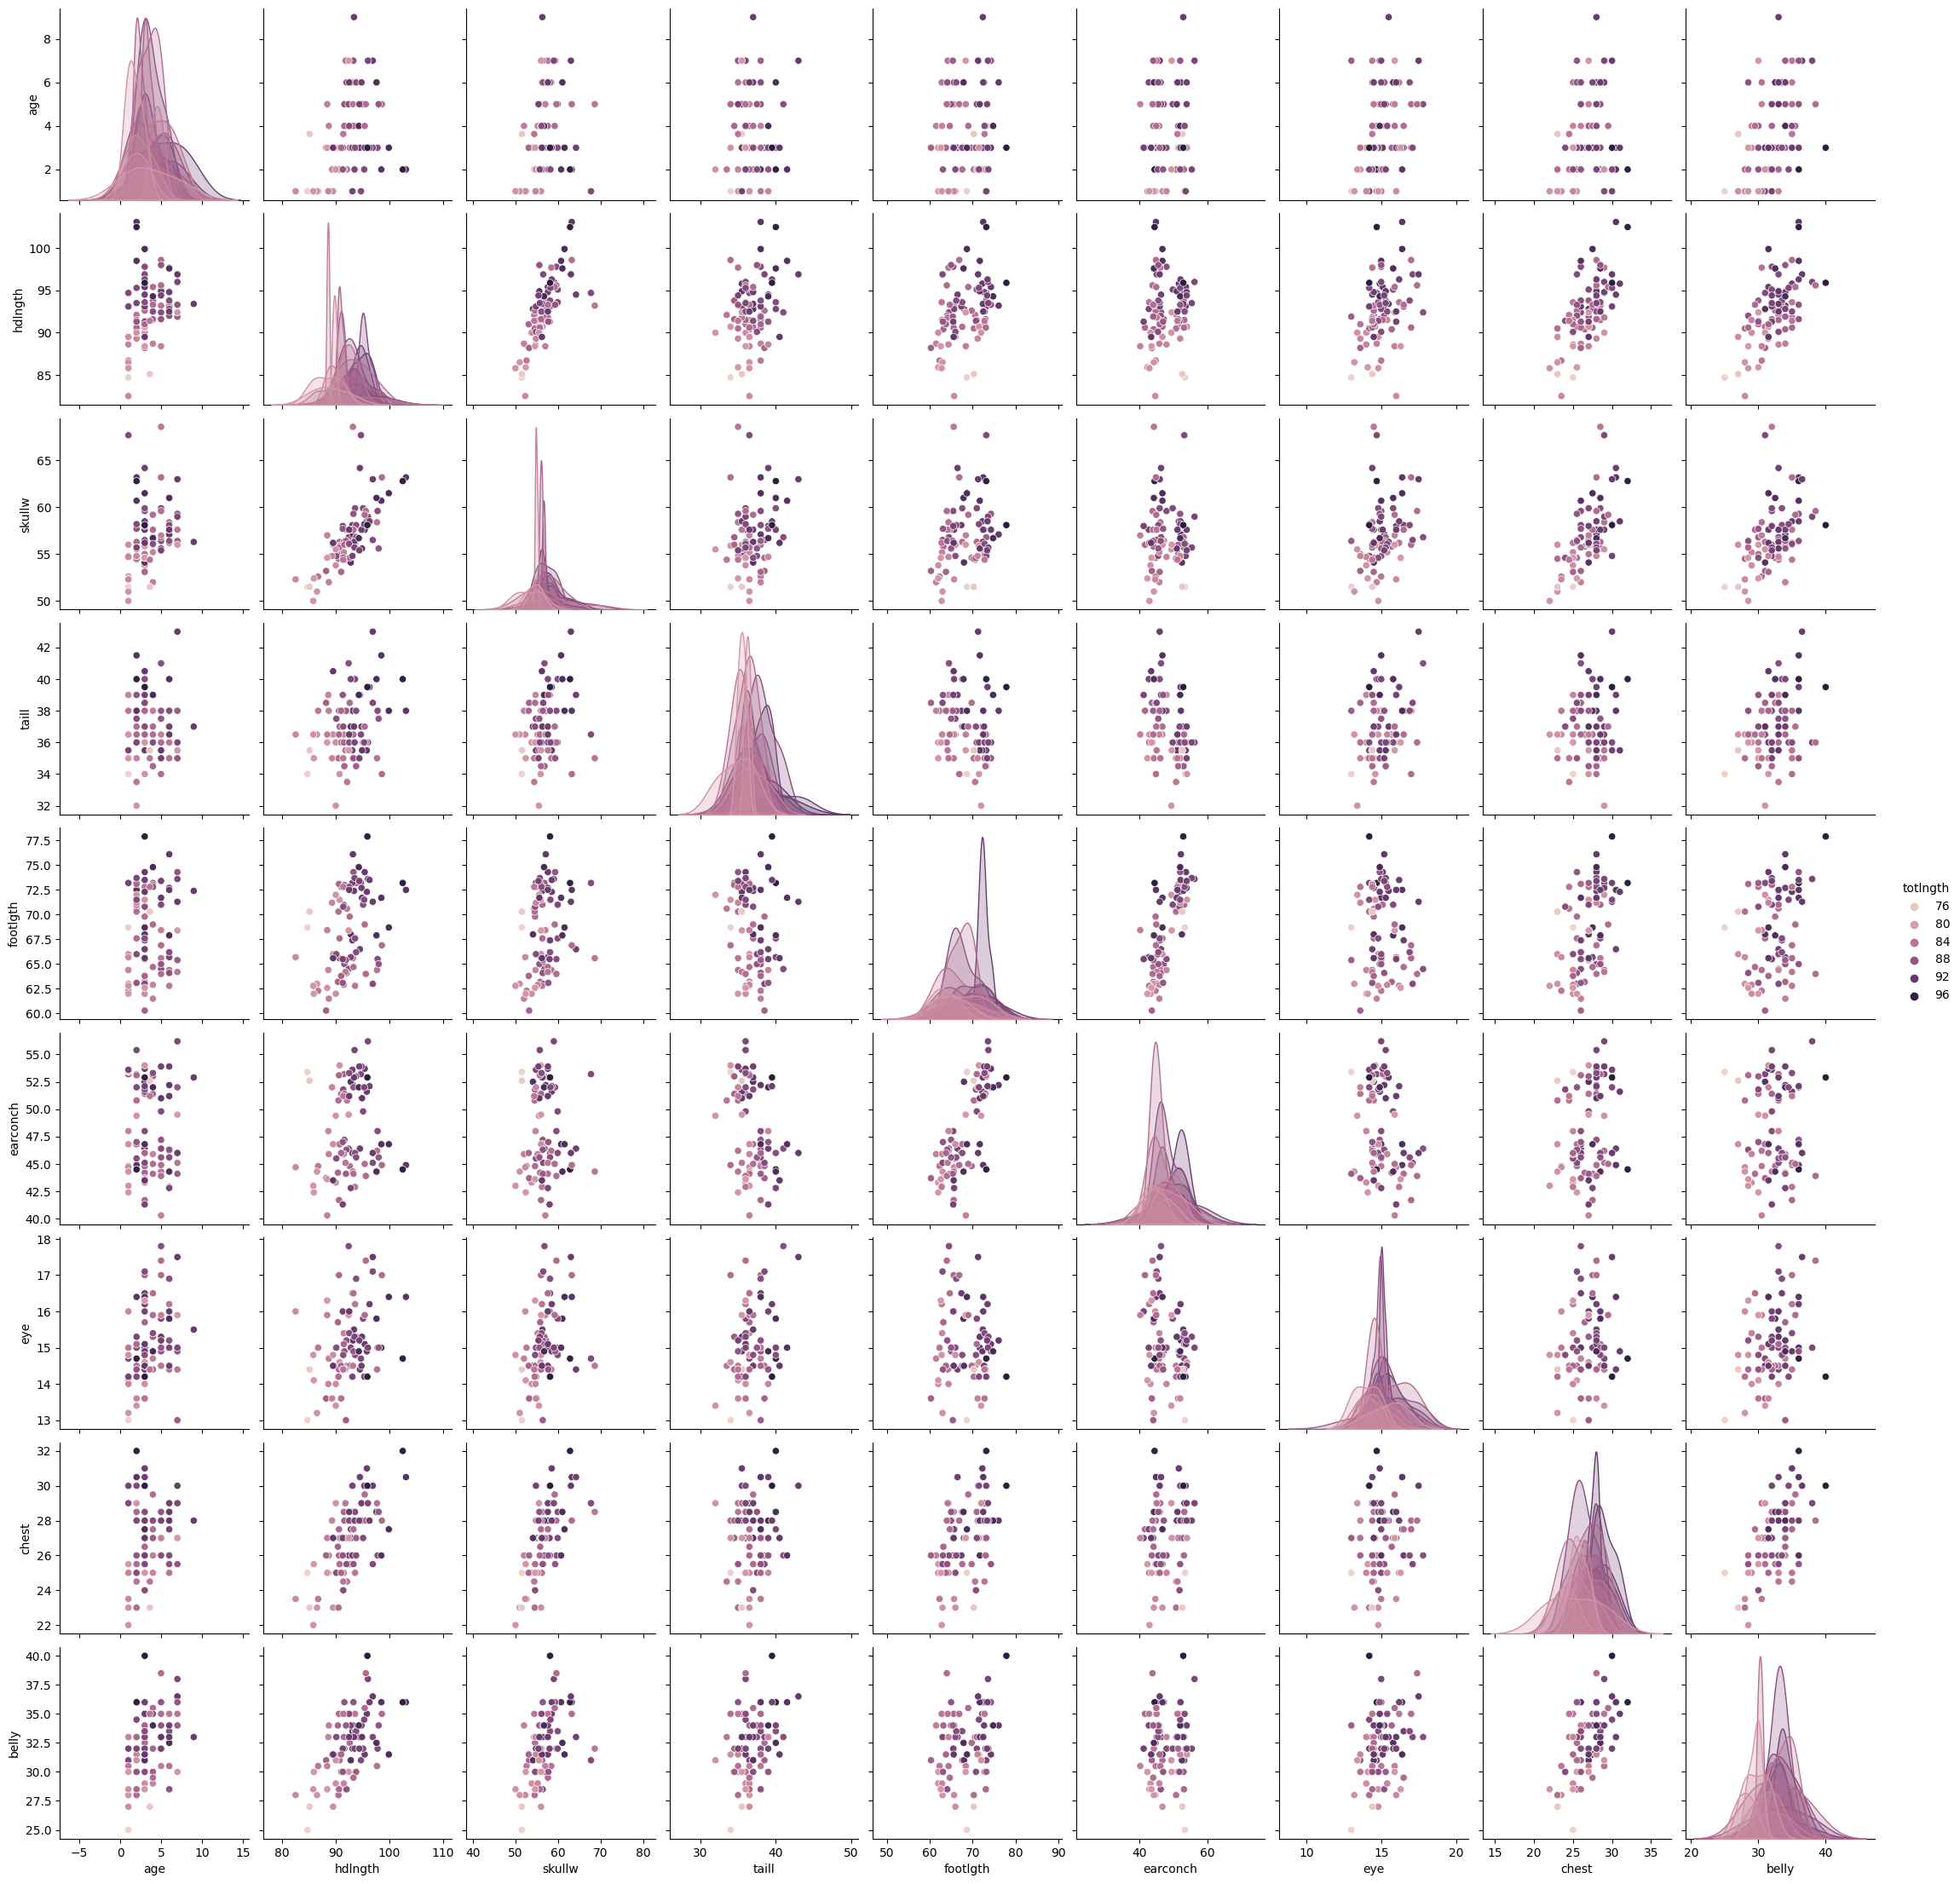

In [35]:
import seaborn as sns
sns.pairplot(xa, hue='totlngth')

Prepare correlation matrix to identify the correlation between independent and target variables

In [36]:
corr = xa.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,totlngth
age,1.000000,0.323361,0.265104,0.071701,0.073463,0.005089,0.324568,0.291777,0.376170,0.225247
hdlngth,0.323361,1.000000,0.728303,0.268526,0.371963,0.105616,0.369745,0.671052,0.612623,0.708514
skullw,0.265104,0.728303,1.000000,0.246903,0.259704,-0.038441,0.335820,0.640623,0.462640,0.510365
taill,0.071701,0.268526,0.246903,1.000000,-0.150612,-0.359236,0.290574,0.118211,0.323525,0.544757
footlgth,0.073463,0.371963,0.259704,-0.150612,1.000000,0.779416,-0.087977,0.456303,0.295731,0.435143
earconch,0.005089,0.105616,-0.038441,-0.359236,0.779416,1.000000,-0.274542,0.209005,0.034206,0.184272
eye,0.324568,0.369745,0.335820,0.290574,-0.087977,-0.274542,1.000000,0.112987,0.315432,0.265494
chest,0.291777,0.671052,0.640623,0.118211,0.456303,0.209005,0.112987,1.000000,0.595475,0.573376
belly,0.376170,0.612623,0.462640,0.323525,0.295731,0.034206,0.315432,0.595475,1.000000,0.575993
totlngth,0.225247,0.708514,0.510365,0.544757,0.435143,0.184272,0.265494,0.573376,0.575993,1.000000


To select the best 3 features, the parameters chosen must be nearest to 1 or -1.

In this case, the 3 features are: hdlngth, belly and chest.

In [37]:
#Select the 3 parameters that are the closest to 1
sel = ['hdlngth','belly','chest']
X_new = X_train[sel]
X_new_test = X_test[sel]
X_new.head()

,hdlngth,belly,chest
49,91.6,36.0,28.0
54,103.1,36.0,30.5
65,90.4,34.0,26.5
16,94.7,31.0,29.0
90,97.8,32.0,26.0


In [38]:
Y_train.head()

,totlngth
49,88.0
54,92.5
65,86.0
16,89.5
90,89.0


### Perform Linear Regression

In [39]:
#Create linear regression object
regr = LinearRegression() #making an instance

#Train the model using the training sets
regr.fit(X_new, Y_train)

#Make predictions using the testing set
Y_pred = regr.predict(X_new_test)

#The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept or Bias: \n', regr.intercept_)

#The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

#The Mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test, Y_pred))

#Explained variance score (R2 Score): 1 is perfect prediction
print('R2 score: %.2f' % r2_score(Y_test, Y_pred))


Coefficients: 
 [[0.60277574 0.30678101 0.24119626]]
Intercept or Bias: 
 [14.84975949]
Mean squared error: 9.39
Mean absolute error: 2.57
R2 score: 0.39


## Q2c) Explain performance of 3 metrics chosen

The three performance metrics are Mean Squared Error, Mean Absolute Error and R2 score which is also known as the variance score.

Mean Squared Error determines how error infused the model is. The perfect score of Mean Squared Error is 0 which means that the model does not have any errors. The Mean Squared Error for this model is very far from 0 and it indicates that there are some errors in the model and improvements has to be made to reduce the level of errors.

Mean Absolute Error determines how bias the model is. It makes sure that outliers doesn't have a huge impact on the biasness of the model. The perfect score of Mean Absolute Error is 0 which means that the model does not have any biasness. The Mean Absolute Error for this model is abit far from 0 and it indicates that there are some biasness in the model and improvements has to be made to reduce the level of biasness.

R2 score determines how well the data fits the regression model. THe perfect score of R2 is 1 which means that the data fits perfectly into the regression model. The R2 score for this model is abit far from 1 and it indicates that the data somewhat fits the regression model but improvements has to be made to increase the level of fit of data in the regression model.